## Downloading the stock price data from 27 July 2017 to 27 july 2022

In [1]:
## TYPE YOUE CODE BELOW
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

%matplotlib inline
import monthly_returns_heatmap as mrh
from pandas_datareader import data as pdr

start = datetime.datetime(2017, 7, 27)
end = datetime.datetime(2022, 6, 27)
# all_stocks_list = ['AMZN', 'MMM','FB','IBM']
# all_stocks = yf.download(all_stocks_list, start = start,end = end)
amzn = yf.download('AMZN', start = start,end = end)
mmm =  yf.download('MMM', start = start,end = end)
fb =   yf.download('FB', start = start,end = end)
ibm =  yf.download('IBM', start = start,end = end)
# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Resampling and ploting the data to get prices for the end of the business month by selecting the Adjusted Close for each stock

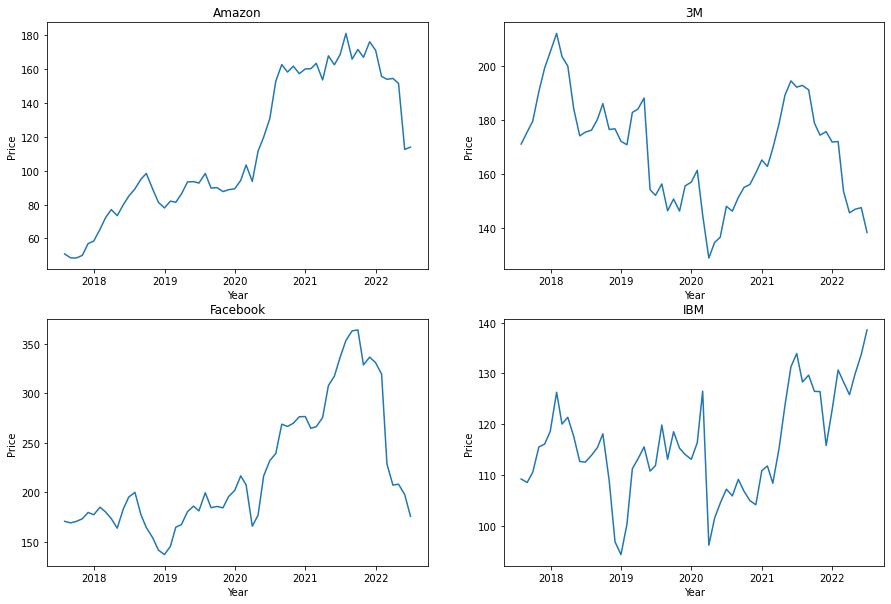

In [5]:

# Creating pandas series for amazon adjusted price
Adj_price_amzn=amzn['Adj Close']
# Creating pandas series for 3M adjusted price
Adj_price_mmm=mmm['Adj Close']
# Creating pandas series for FB adjusted price
Adj_price_fb=fb['Adj Close']
# Creating pandas series for IBM adjusted price
Adj_price_ibm=ibm['Adj Close']

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,10))
ax1.set_title('Amazon', fontsize='large', loc='center')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
# Resampling and Plotting Amazon end of month adjusted price
ax1.plot(Adj_price_amzn.resample('BM').mean())

ax2.set_title('3M', fontsize='large', loc='center')
ax2.set_xlabel('Year')
ax2.set_ylabel('Price')
# Resampling and Plotting 3M end of month adjusted price
ax2.plot(Adj_price_mmm.resample('BM').mean())

ax3.set_title('Facebook', fontsize='large', loc='center')
ax3.set_xlabel('Year')
ax3.set_ylabel('Price')
# Resampling and Plotting FB end of month adjusted price
ax3.plot(Adj_price_fb.resample('BM').mean())

ax4.set_xlabel('Year')
ax4.set_ylabel('Price')
ax4.set_title('IBM', fontsize='large', loc='center')
# Resampling and Plotting IBM end of month adjusted price
ax4.plot(Adj_price_ibm.resample('BM').mean())


## Plotting the autocorrelation of the adjusted month-end close prices

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

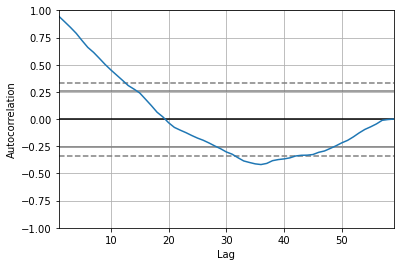

In [6]:
# Creating Pandas series for amazon month end close price by filling the Nan with front fill and plotting autocorrelation
amzn_month_end_price = amzn['Adj Close'].asfreq('BM',method='ffill')

autocorrelation_plot(amzn_month_end_price)


* From the Plot above it is clear that at lag 1 the plot is highly autocorrelated and starts apprximately at 0.9 and then slowly decline linearly and reaches 99% CI after 15 lags and continues to decrease until it shows negative correlation till 35 lag and then come back to zero correlation before 60 lags.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

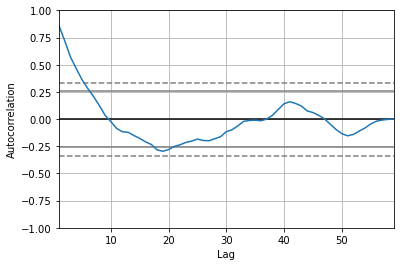

In [324]:
# Creating Pandas series for 3M month end close price by filling the Nan with front fill and plotting autocorrelation
mmm_month_end_price = mmm['Adj Close'].asfreq('BM',method='ffill')
autocorrelation_plot(mmm_month_end_price)

* From the Plot above for 3M data set it shows that at lag 1 the plot is highly autocorrelated and starts apprximately at 0.8 and then decline very fast until reaches just befor 10 lag and continues to decrease until it shows negative correlation till 18 lag and then come back to zero correlation after 30 lags and then shows random correlation. Plot can also be interpreted as sin wave with decaying amplitude as lag grows.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

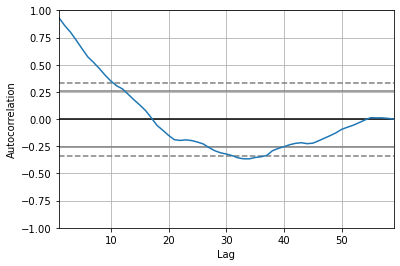

In [325]:
# Creating Pandas series for FB month end close price by filling the Nan with front fill and plotting autocorrelation
fb_month_end_price = fb['Adj Close'].asfreq('BM',method='ffill')
autocorrelation_plot(fb_month_end_price)

* FB dataset plot is also similar to Amazon data set which shows high autocorrelation at lag 1 whcih is above 0.8 approx. and it also falls linearly until it reaches to 0 at lag apprx. to 17 and continues to fall with minor noise and reaches lower 99% CI after 30 lag and bounces back to zero.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

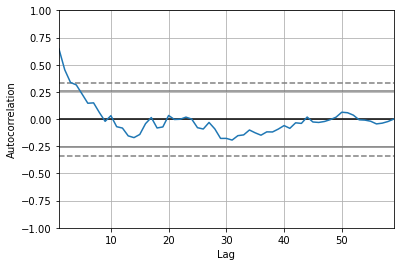

In [326]:
# Creating Pandas series for IBM month end close price by filling the Nan with front fill and plotting autocorrelation
ibm_month_end_price = ibm['Adj Close'].asfreq('BM',method='ffill')
autocorrelation_plot(ibm_month_end_price)

* IBM dataset autocorrelation shows that it started from approx 0.6 at lag 1 and fall very quickly to 0. The plot show there is lot of noise in the data and almost 90 % of plot s between 99% CI. So we can consider the data set as random and there is no significant correlation.





## Monthly return of each stock

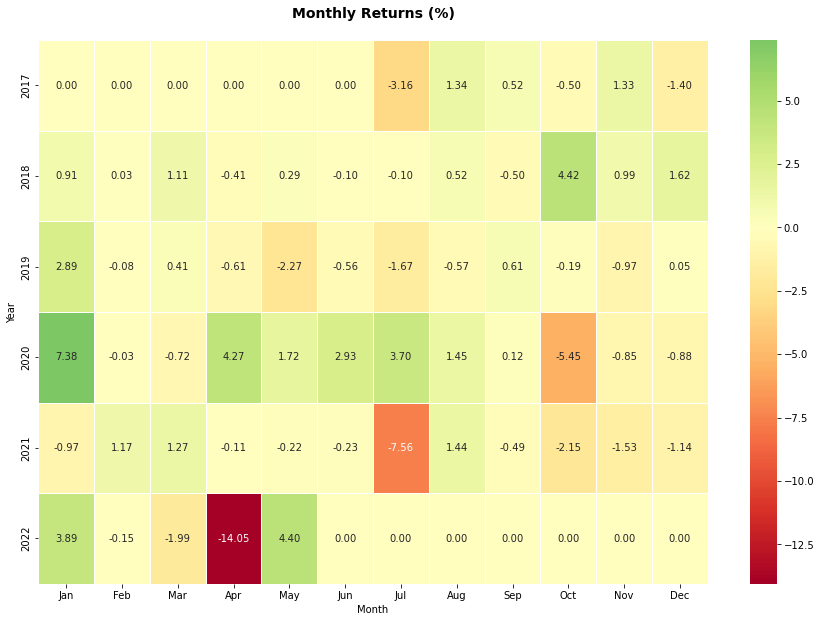

In [31]:
# Calculating monthly return of Amazon by using shift trick and creating heat map using monthly_returns_heatmap library.
amzn['Last close'] = amzn['Adj Close'].shift(1)
amzn['Return_AMZN']= ((amzn['Adj Close']/amzn['Last close'])-1)
return_per_amzn = amzn['Return_AMZN'].asfreq('BM',method='ffill')


mrh.plot(return_per_amzn,figsize=(15,10))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

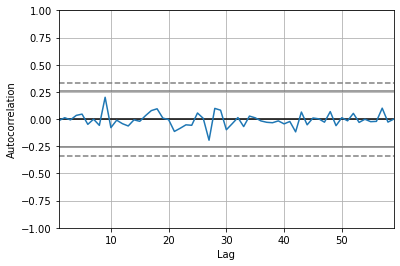

In [18]:
autocorrelation_plot(return_per_amzn)

Monthly return autocorrelation is very random as it is very close to zero.

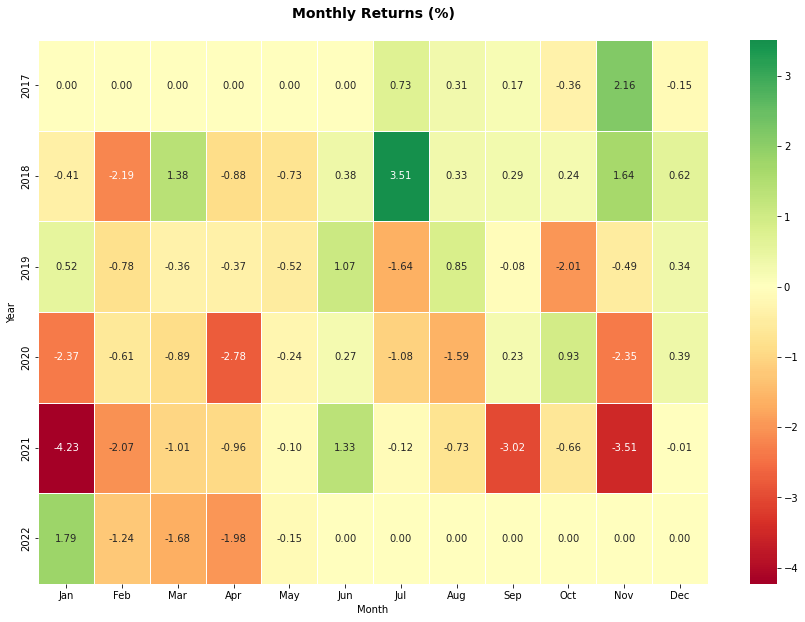

In [19]:
# Calculating monthly return of 3M by using shift trick and creating heat map using monthly_returns_heatmap library.
mmm['Last close'] = mmm['Adj Close'].shift(1)
mmm['Return_3M']= ((mmm['Adj Close']/mmm['Last close'])-1)
return_per_mmm = mmm['Return_3M'].asfreq('BM',method='ffill')

mrh.plot(return_per_mmm,figsize=(15,10))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

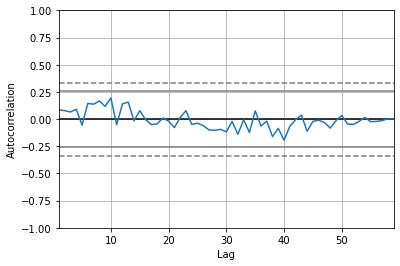

In [20]:
autocorrelation_plot(return_per_mmm)

Monthly return autocorrelation is very random as it is very close to zero.

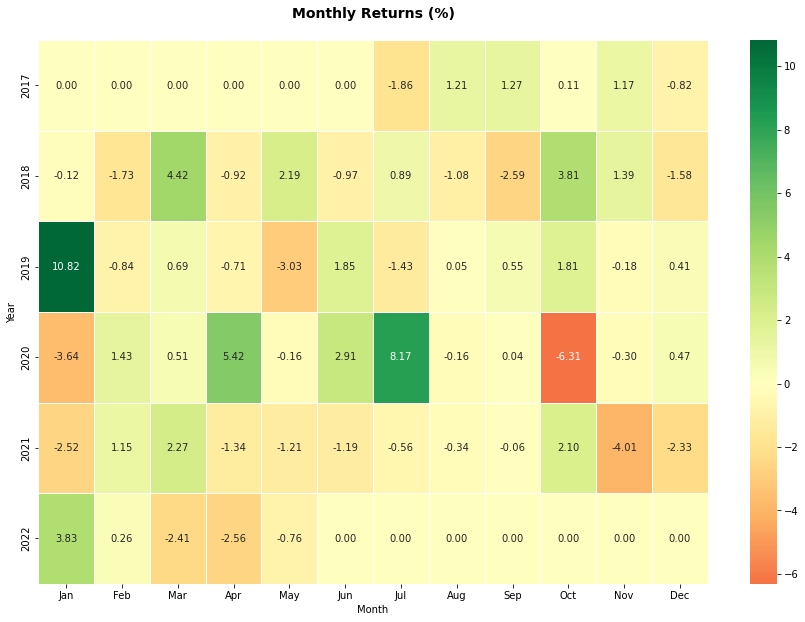

In [21]:
# Calculating monthly return of FB by using shift trick and creating heat map using monthly_returns_heatmap library.
fb['Last close'] = fb['Adj Close'].shift(1)
fb['Return_FB']= ((fb['Adj Close']/fb['Last close'])-1)
return_per_fb = fb['Return_FB'].asfreq('BM',method='ffill')

mrh.plot(return_per_fb,figsize=(15,10))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

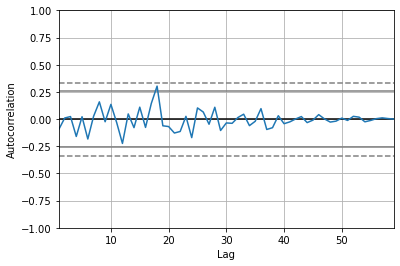

In [24]:
autocorrelation_plot(return_per_fb)

Monthly return autocorrelation is very random as it is very close to zero.

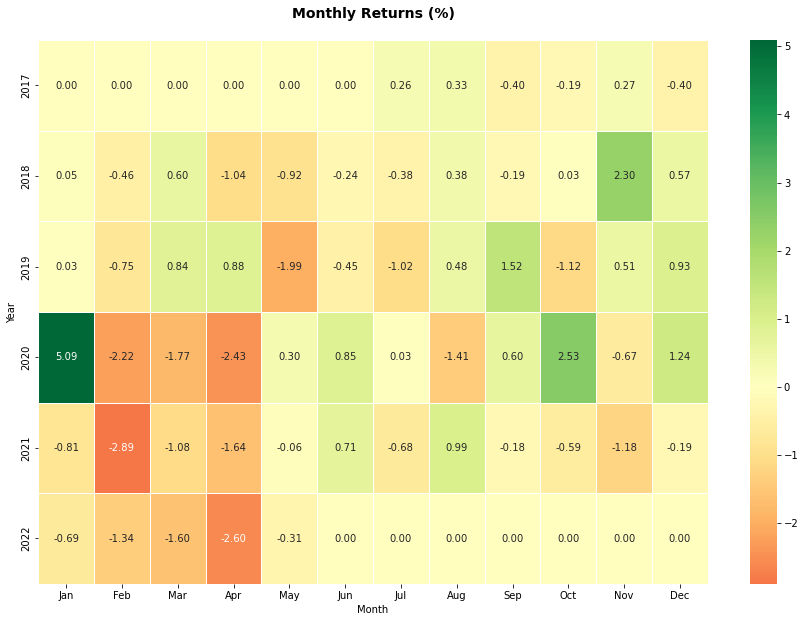

In [25]:
# Calculating monthly return of IBM by using shift trick and creating heat map using monthly_returns_heatmap library.
ibm['Last close'] = ibm['Adj Close'].shift(1)
ibm['Return_IBM']= ((ibm['Adj Close']/ibm['Last close'])-1)
return_per_ibm = ibm['Return_IBM'].asfreq('BM',method='ffill')


mrh.plot(return_per_ibm,figsize=(15,10))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

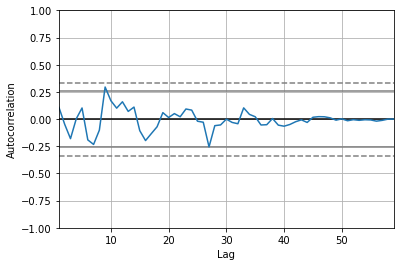

In [26]:
autocorrelation_plot(return_per_ibm)

For all 4 stocks the return are very random and there the autocorrelation is very closed to zero.

In [28]:
AMA=amzn['Return_AMZN']
MMM=mmm['Return_3M']
FB=fb['Return_FB']
IBM=ibm['Return_IBM']
Multi_stock=pd.concat([AMA,MMM,FB,IBM],axis=1).dropna()
Multi_stock

,Return_AMZN,Return_3M,Return_FB,Return_IBM
Date,,,,
2017-07-28,-0.024818,-0.001649,0.011793,-0.005376
2017-07-31,-0.031626,0.007260,-0.018556,0.002634
2017-08-01,0.008514,0.009991,0.003604,0.004355
2017-08-02,-0.000301,0.010976,-0.003297,-0.005850
2017-08-03,-0.009007,0.010759,-0.004194,0.003392
...,...,...,...,...
2022-06-17,0.024696,-0.008401,0.017841,-0.004791
2022-06-21,0.023159,0.001309,-0.040857,0.020960
2022-06-22,0.002484,0.003000,-0.007641,-0.005586


array([[<AxesSubplot:xlabel='Return_AMZN', ylabel='Return_AMZN'>,
        <AxesSubplot:xlabel='Return_3M', ylabel='Return_AMZN'>,
        <AxesSubplot:xlabel='Return_FB', ylabel='Return_AMZN'>,
        <AxesSubplot:xlabel='Return_IBM', ylabel='Return_AMZN'>],
       [<AxesSubplot:xlabel='Return_AMZN', ylabel='Return_3M'>,
        <AxesSubplot:xlabel='Return_3M', ylabel='Return_3M'>,
        <AxesSubplot:xlabel='Return_FB', ylabel='Return_3M'>,
        <AxesSubplot:xlabel='Return_IBM', ylabel='Return_3M'>],
       [<AxesSubplot:xlabel='Return_AMZN', ylabel='Return_FB'>,
        <AxesSubplot:xlabel='Return_3M', ylabel='Return_FB'>,
        <AxesSubplot:xlabel='Return_FB', ylabel='Return_FB'>,
        <AxesSubplot:xlabel='Return_IBM', ylabel='Return_FB'>],
       [<AxesSubplot:xlabel='Return_AMZN', ylabel='Return_IBM'>,
        <AxesSubplot:xlabel='Return_3M', ylabel='Return_IBM'>,
        <AxesSubplot:xlabel='Return_FB', ylabel='Return_IBM'>,
        <AxesSubplot:xlabel='Return_IBM', yla

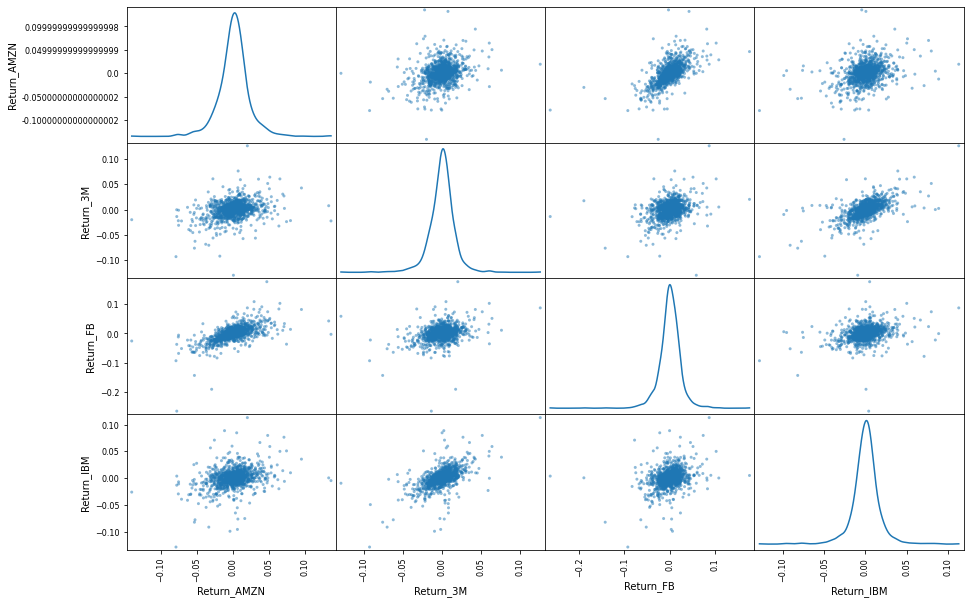

In [29]:
pd.plotting.scatter_matrix(Multi_stock,figsize=(15,10),diagonal='kde')

* For all four stocks monthly return the bell curve show Standard normal distribution and range is low.
* Facebook and Amazon scatterplot is showing positive correlation(0.6 to 0.8) in monthly returns 
* 3M and IBM is also showing positive correlation(0.6 to 0.8) in their monthly returns.
* Amazon and IBM also have positive correlation but it is very small less the 0.4 approx and same is for Amazon and 3M.
* IBM and FB shows very little positive correlation.
* we can see that there is no negative correlation in all four stocks monthly return.
